# City Skyline problem

## Problem Description
Imagine a city with a number of buildings, each represented by a triplet (Li, Ri, Hi) where:

Li is the x-coordinate of the left edge of the building.
Ri is the x-coordinate of the right edge of the building.
Hi is the height of the building.
When visualized from a distance, the skyline of this city appears as a series of rectangles formed by the tops of these buildings. Your task is to compute the city's skyline, which can be defined as a list of critical points. A critical point is either:

The left or right edge of a building where the height of the skyline changes.
A point where one building ends, and another taller or shorter building affects the skyline.
The skyline itself is represented by a list of points (x, h), where:

x is the x-coordinate where the height changes.
h is the height of the skyline at that point.
For example, given several buildings, the output is a list of the critical points of the skyline, representing the outline of the buildings from the leftmost to the rightmost x-coordinates.

## Objective
You are to implement an algorithm to compute the skyline formed by a series of buildings. The problem can be solved using brute force, but the ideal approach is to use the Divide and Conquer method, which provides a more efficient solution.

## Input
The first line contains an integer n (1 ≤ n ≤ 10^4), representing the number of buildings.
The next n lines each contain three integers Li, and Ri and Hi,  (1 ≤ Li < Ri ≤ 10^9, 1 ≤ Hi ≤ 10^6), representing the left edge, height, and right edge of the i-th building, respectively.
Output
Output a list of pairs (x, h), representing the critical points of the skyline from left to right. Each pair should represent a change in the skyline's height at the x-coordinate x.
Constraints
Time Complexity: While brute force approaches are acceptable for small inputs, aim to solve the problem with a time complexity of O(n log n) using Divide and Conquer.
Memory Constraints: Your solution should be efficient in terms of space, ideally using O(n) additional space.
Handling Edge Cases:
Buildings with overlapping or touching edges.
Buildings that are completely hidden behind taller buildings.
Buildings with the same height or width but different positions.
## Example
### Input:
Input will be a .txt file in a following format

3
2,9,10
3,7,15
5,12,12
15,20,10
19,24,8

### Output:
2,10
3,15
7,12
12,0
15,10
20,8
24,0

### Explanation:


## Notes

Brute Force Solution: Iterate over each x-coordinate between the leftmost and rightmost building edges and calculate the maximum height at each point. This solution has a time complexity of O(n²) in the worst case.

Divide and Conquer Solution: Break the problem into smaller sub-problems by dividing the set of buildings into two halves, compute the skyline for each half, and then merge the results. This approach has a time complexity of O(n log n).

## Submission Instructions
Your code should be submitted in [Python, Java, C++, etc.].
Ensure to test your code with edge cases such as:
Buildings with equal heights.
Buildings that overlap perfectly in the x-coordinate range.
Buildings with no overlap.
Note: the problem is very similar to following problem on LeetCode: https://leetcode.com/problems/the-skyline-problem/description/

[[0, 3], [5, 0]]


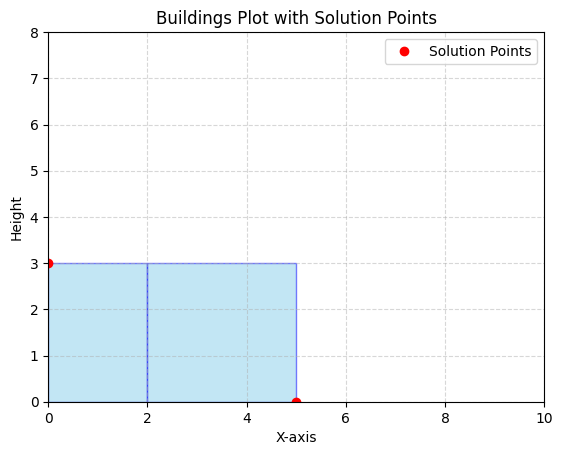

In [2]:
#Žeiris_Eduards_231RDB348
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import requests

def get_buildings(src):
    buildings = []

    if src.startswith('http://') or src.startswith('https://'):
        try:
            response = requests.get(src)
            response.raise_for_status()  # Raise an exception for bad status codes
            lines = response.text.splitlines()
        except requests.exceptions.RequestException as e:
            print(f"Error downloading from URL: {e}")
            return buildings
    else:
        try:
            with open(src) as file:
                lines = file.readlines()
        except FileNotFoundError:
            print(f"Error: File not found at {src}")
            return buildings


    n = int(lines[0].strip())

    for line in lines[1:n+1]:
        # Strip whitespace and split by comma
        numbers = [int(num) for num in line.strip().split(',')]
        buildings.append(numbers)
    return buildings

def main(src="https://raw.githubusercontent.com/ValRCS/RBS_PBM771_Algorithms/refs/heads/main/exercises/city_skyline/small_buildings.txt"):
    buildings = get_buildings(src)

    if not buildings:  # Check if buildings list is empty after trying to get data
        print("Could not load buildings data. Exiting.")
        return

    bfPoints = bruteforce(buildings)
    solution = getSolution(bfPoints)
    print(solution)
    plot_buildings(buildings, solution)


def bruteforce(buildings):
    # first we find out how far to the right we need to go
    max_right = max(building[1] for building in buildings) + 2 # so O(n) n buildings
    maxAt = [] # we could have initialized this with 0s but it's not necessary

    # the complexity of this solution is O(n * m) where n is the number of buildings and m is the distance to the right
    for i in range(0, max_right): # so if max_right is very large this brute force might be unfeasible
    # our assignmens says max_right could be up to 1_000_000_000 so not efficient
        maxAt.append(0) # since we skipped initialization we need to append 0s,
        # we need to add 0s because it is possible that no building is in the range of i
        for building in buildings: # so up to 10_000 buildings
            if i >= building[0] and i <= building[1]: # we check whether building is in the range
                maxAt[i] = max(building[2], maxAt[i])

    return maxAt

def getSolution(maxAt):
    solution = []
    for i in range(0, len(maxAt)):

        if maxAt[i] > maxAt[i - 1]:
            solution.append([i, maxAt[i]]) # we add critical points to the solution, here means we are increasing height
        elif maxAt[i] < maxAt[i - 1]:
            solution.append([i - 1, maxAt[i]]) # we add critical points to the solution, here we drop the height
        # so if no change in height we don't add anything to the solution

    # solution.remove([-1,0])
    return solution

#chat gpt prompt - in a seperate function plot the rectangles in a graph such that the 1st number is left side, 2nd is height and 3rd is right side
#chat gpt prompt - now in the plot function plot points from variable solution that is in the form [[x,y], [x, y]]
def plot_buildings(buildings, solution):
    fig, ax = plt.subplots()

    # Plot buildings as rectangles
    for building in buildings:
        left = building[0]
        right = building[1]
        height = building[2]
        width = right - left

        # Create a rectangle patch
        rect_patch = patches.Rectangle(
            (left, 0),        # (x,y) position of the lower-left corner
            width,            # Width of the rectangle
            height,           # Height of the rectangle
            linewidth=1,
            edgecolor='blue',
            facecolor='skyblue',
            alpha=0.5
        )
        ax.add_patch(rect_patch)

    # Plot the solution points in red without connecting them
    x_values = [point[0] for point in solution]
    y_values = [point[1] for point in solution]

    # Plotting the points with red circles
    ax.plot(x_values, y_values, 'ro', label='Solution Points')

    # Set the limits of the axes
    max_right = max([building[1] for building in buildings] + x_values) + 5
    max_height = max([building[2] for building in buildings] + y_values) + 5
    ax.set_xlim(0, max_right)
    ax.set_ylim(0, max_height)

    # Add grid, labels, and title for clarity
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Height')
    ax.set_title('Buildings Plot with Solution Points')

    # Add legend
    ax.legend()

    # Display the plot
    plt.show()

main()

[[2, 10], [3, 15], [7, 12], [12, 0], [15, 10], [20, 8], [24, 0]]


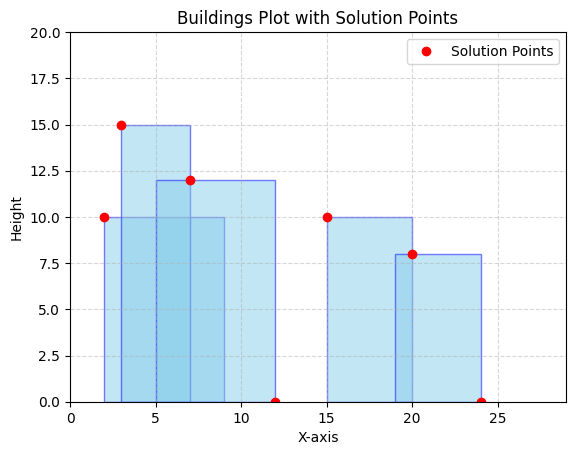

In [3]:
main("https://raw.githubusercontent.com/ValRCS/RBS_PBM771_Algorithms/refs/heads/main/exercises/city_skyline/buildings.txt")

## Divide and Conquer solution

### Idea

We have base case DIVIDE - one building then we have a solution

We also have the CONQUER - where we merge the solutions

So all we really need to come up with is an efficient merge solution/algorithm

In [5]:
# let's implement a divide and conquer approach
# we will split the buildings into two halves and then merge the results recursively

def divide_and_conquer(buildings):
    if len(buildings) == 1:
        building = buildings[0]
        # so for single building we return two points, one at the left with building height and one at the right with 0 where the building ends
        return [[building[0], building[2]], [building[1], 0]]
    # now real work starts
    mid = len(buildings) // 2
    left = divide_and_conquer(buildings[:mid])
    right = divide_and_conquer(buildings[mid:])

    return merge(left, right) # we leave the merge function to be implemented later

# some definite similarities between merge sort and this function
def merge(left, right):
    i = 0 # so these are like pointers in merge sort
    j = 0
    h1 = 0 # current height of left skyline
    h2 = 0 # current height of right skyline
    result = []

    # we keep mergning while we still have indexes to process
    while i < len(left) and j < len(right): # so linear O(len left+right)

        if left[i][0] < right[j][0]:
            x = left[i][0]
            h1 = left[i][1]
            i += 1
        elif left[i][0] > right[j][0]:
            x = right[j][0]
            h2 = right[j][1]
            j += 1
        else:
            x = left[i][0]
            h1 = left[i][1]
            h2 = right[j][1]
            i += 1
            j += 1

        h = max(h1, h2)
        if len(result) == 0 or h != result[-1][1]: # so we check for initial case and if the height is different from the last height we added
            result.append([x, h])

    # after merge we need to add the remaining points from ONE of the lists
    # the below two blocks are similar but only one of them will run - whichever list has remaining points
    while i < len(left):
        result.append(left[i])
        i += 1

    while j < len(right):
        result.append(right[j])
        j += 1

    return result

In [4]:
# first lets get buildings
buildings = get_buildings("https://raw.githubusercontent.com/ValRCS/RBS_PBM771_Algorithms/refs/heads/main/exercises/city_skyline/buildings.txt")
# print buildings
print(buildings)

[[2, 9, 10], [3, 7, 15], [5, 12, 12], [15, 20, 10], [19, 24, 8]]


In [6]:
# let's get a solution
solution = divide_and_conquer(buildings)
print(solution)

[[2, 10], [3, 15], [7, 12], [12, 0], [15, 10], [20, 8], [24, 0]]


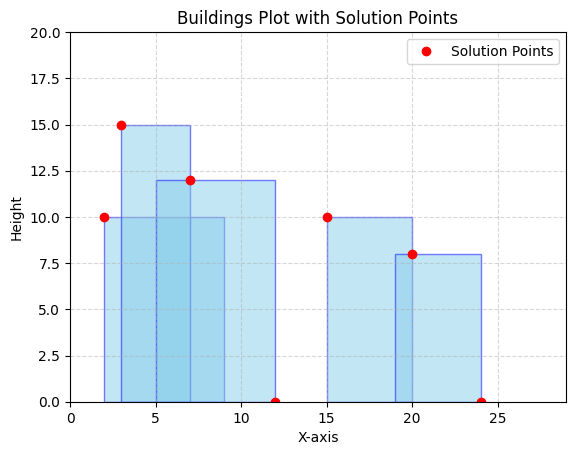

In [7]:
# let's visualize the solution and buildings
plot_buildings(buildings, solution)

In [10]:
# let's try this on small buildings
small_buildings = get_buildings("https://raw.githubusercontent.com/ValRCS/RBS_PBM771_Algorithms/refs/heads/main/exercises/city_skyline/small_buildings.txt")
print(small_buildings)
small_solution = divide_and_conquer(small_buildings)
print(small_solution)

[[0, 2, 3], [2, 5, 3]]
[[0, 3], [5, 0]]


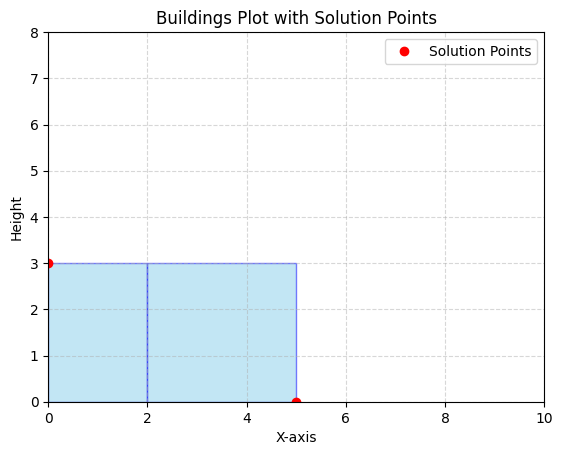

In [11]:
# let's plot it
plot_buildings(small_buildings, small_solution)

## Generating Large Dataset of Buildings

### Input constraints
* The first line contains an integer n (1 ≤ n ≤ 10^4), representing the number of buildings.
* The next n lines each contain three integers Li, and Ri and Hi,  (1 ≤ Li < Ri ≤ 10^9, 1 ≤ Hi ≤ 10^6), representing the left edge, height, and right edge of the i-th building, respectively.

Example with 2 buildings so 3 rows, with first row(index 0) containing number of buildings
`
2
0,2,3
2,5,3
`

In [12]:
# Let's generate maximum size dataset of buildings given above constraints
import random
# let's make a function that returns list of building triplets (l,r,h) given parameters num_buildings=10_000, l_min=1, r_max=1_000_000_000, min_h=1, max_h=1_000_000, seed=2025

def get_random_buildings(num_buildings=10_000, l_min=1, r_max=1_000_000_000, min_h=1, max_h=1_000_000, seed=2025):
    random.seed(seed)
    buildings = []
    for _ in range(num_buildings):
        l = random.randint(l_min, r_max - 1)
        r = random.randint(l + 1, r_max)
        h = random.randint(min_h, max_h)
        buildings.append([l, r, h])
    return buildings

In [13]:
max_buildings = get_random_buildings()
# how many
print(f"Number of buildings: {len(max_buildings)}")

Number of buildings: 10000


In [16]:
# what is our limit for recursion?
import sys
print(f"Maximum recursion depth: {sys.getrecursionlimit()}")
# if less than 1_000_000 increase to 1m
if sys.getrecursionlimit() < 1_000_000:
    sys.setrecursionlimit(1_000_000)
    print(f"Maximum recursion depth set to: {sys.getrecursionlimit()}")


Maximum recursion depth: 1000
Maximum recursion depth set to: 1000000


In [17]:
# now the big test on 10k buildings - max_buildings
max_solution = divide_and_conquer(max_buildings)

In [18]:
# let's time our max_buildings
%%timeit
divide_and_conquer(max_buildings)

39.7 ms ± 5.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Divide and Conquer versus Brute force

We can see that divide and conquer can handle the max constraints with ease.

Trying this with Brute Force should take a very long time....

In [ ]:
# TODO for next year check 1k and 100k size buildings